In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [4]:
df = pd.read_excel('C:/Users/ADMIN/Desktop/python/python/python/customer_segment/Online Retail.xlsx',sheet_name='Online Retail') 

In [5]:
df.shape

(541909, 8)

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
# I. data cleaning
# 1. Loai bo cac don dat hang da huy
df = df.loc[df['Quantity'] > 0] 
df.shape


(531285, 8)

In [8]:
# 2. Loai bo ho so khong co Customer ID
df = df[pd.notnull(df['CustomerID'])]
df.shape

(397924, 8)

In [9]:
# 3. Bo di thang khong du ngay
df['InvoiceDate'].max()


Timestamp('2011-12-09 12:50:00')

In [10]:
df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [11]:
df = df.loc[df['InvoiceDate']<'2011-12-01']
df.shape

(380620, 8)

In [12]:
# 4. Tinh tong doanh thu (Quantity * UnitPrice)
df['Sales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
# 5. Group nhom khach hang
customer_df = df.groupby('CustomerID').agg({
    'Sales': "sum",
    'InvoiceNo': lambda x: x.nunique()
})
customer_df.columns = ['TotalSales','OrderCount']
customer_df['AvgOrderValue'] = customer_df['TotalSales']/customer_df['OrderCount']

In [32]:
customer_df.head()

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,77183.60,1,77183.600000
12347.0,4085.18,6,680.863333
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000


In [ ]:
# 6. xep hang du lieu (dung method = 'first')
# khi gap trung lap thu hang se duoc gan theo thu tu xuat hien.
# Gia tri nao xuat hien truoc se nhan thu hang thap hon
rank_df = customer_df.rank(method='first')
rank_df

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,4290.0,1.0,4298.0
12347.0,3958.0,3470.0,3888.0
12348.0,3350.0,2861.0,3303.0
12349.0,3321.0,2.0,4238.0
12350.0,1241.0,3.0,2561.0
...,...,...,...
18280.0,571.0,1537.0,1094.0
18281.0,104.0,1538.0,169.0
18282.0,158.0,1539.0,266.0


In [34]:
# 7. chuan hoa du lieu co gia tri trung binh la 0 va do lech chuan la 1 (su dung du lieu nay de phan tich cum K-mean)
normalized_df = (rank_df - rank_df.mean())/rank_df.std()
normalized_df.head()

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,1.724999,-1.731446,1.731446
12347.0,1.457445,1.064173,1.401033
12348.0,0.967466,0.573388,0.929590
12349.0,0.944096,-1.730641,1.683093
12350.0,-0.732148,-1.729835,0.331622


In [35]:
normalized_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4298.000000,4298.000000,4.298000e+03
mean,0.000000,0.000000,-6.612776e-18
std,1.000000,1.000000,1.000000e+00
min,-1.731446,-1.731446,-1.731446e+00
25%,-0.865723,-0.865723,-8.657232e-01
50%,0.000000,0.000000,0.000000e+00
75%,0.865723,0.865723,8.657232e-01
max,1.731446,1.731446,1.731446e+00


In [37]:
# II. phan tich phan cum, dung thuat toan K-mean
# xay dung va dieu chinh mo hinh
# chia du lieu thanh 4 phan doan
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalSales','OrderCount','AvgOrderValue']])
kmeans


KMeans(n_clusters=4)

In [38]:
# truy xuat du lieu
kmeans.labels_


array([1, 2, 2, ..., 3, 0, 2])

In [39]:
kmeans.cluster_centers_

array([[ 0.33623869,  0.81468809, -0.60672331],
       [-0.16044419, -0.85567505,  0.76388977],
       [ 1.20249775,  0.95952787,  0.94239226],
       [-1.21348286, -0.75405065, -1.05429352]])

In [43]:
# 1. Xay dung mo hinh phan cum 1:
fous_cluster_df = normalized_df[['TotalSales','OrderCount','AvgOrderValue']].copy(deep=True)
# luu thong tin nhan cho cum
fous_cluster_df['Cluster'] = kmeans.labels_

In [44]:
fous_cluster_df.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.724999,-1.731446,1.731446,1
12347.0,1.457445,1.064173,1.401033,2
12348.0,0.967466,0.573388,0.929590,2
12349.0,0.944096,-1.730641,1.683093,1
12350.0,-0.732148,-1.729835,0.331622,1


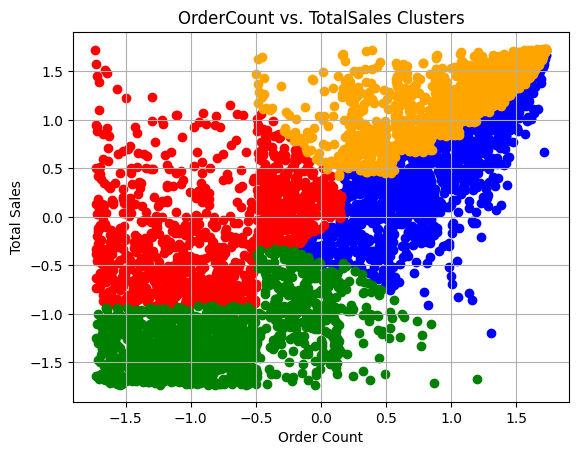

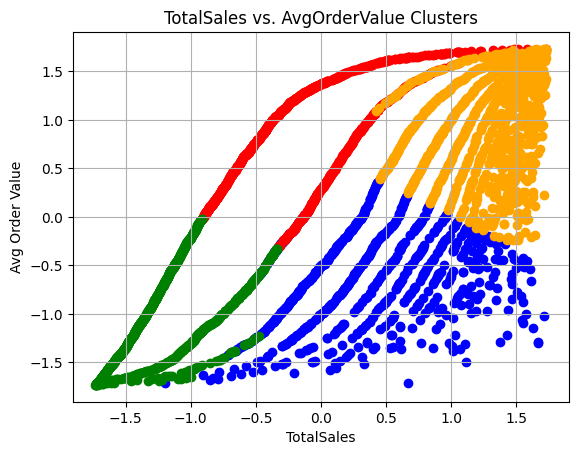

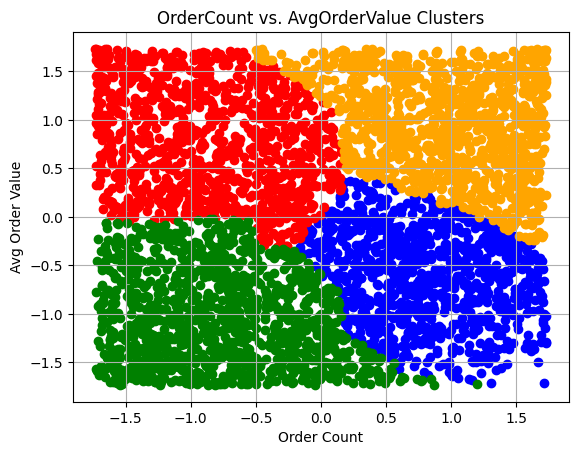

In [53]:
plt.scatter(
    fous_cluster_df.loc[fous_cluster_df['Cluster']==0]['OrderCount'],
    fous_cluster_df.loc[fous_cluster_df['Cluster']==0]['TotalSales'],
    c='blue'
)
plt.scatter(
    fous_cluster_df.loc[fous_cluster_df['Cluster']==1]['OrderCount'],
    fous_cluster_df.loc[fous_cluster_df['Cluster']==1]['TotalSales'],
    c='red'
)
plt.scatter(
    fous_cluster_df.loc[fous_cluster_df['Cluster']==2]['OrderCount'],
    fous_cluster_df.loc[fous_cluster_df['Cluster']==2]['TotalSales'],
    c='orange'
)
plt.scatter(
    fous_cluster_df.loc[fous_cluster_df['Cluster']==3]['OrderCount'],
    fous_cluster_df.loc[fous_cluster_df['Cluster']==3]['TotalSales'],
    c='green'
)
plt.title('OrderCount vs. TotalSales Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')
plt.grid()
plt.show()
plt.scatter(
    fous_cluster_df.loc[fous_cluster_df['Cluster']==0]['TotalSales'],
    fous_cluster_df.loc[fous_cluster_df['Cluster']==0]['AvgOrderValue'],
    c='blue'
)
plt.scatter(
    fous_cluster_df.loc[fous_cluster_df['Cluster']==1]['TotalSales'],
    fous_cluster_df.loc[fous_cluster_df['Cluster']==1]['AvgOrderValue'],
    c='red'
)
plt.scatter(
    fous_cluster_df.loc[fous_cluster_df['Cluster']==2]['TotalSales'],
    fous_cluster_df.loc[fous_cluster_df['Cluster']==2]['AvgOrderValue'],
    c='orange'
)
plt.scatter(
    fous_cluster_df.loc[fous_cluster_df['Cluster']==3]['TotalSales'],
    fous_cluster_df.loc[fous_cluster_df['Cluster']==3]['AvgOrderValue'],
    c='green'
)
plt.title('TotalSales vs. AvgOrderValue Clusters')
plt.xlabel('TotalSales')
plt.ylabel('Avg Order Value')
plt.grid()
plt.show()
plt.scatter(
    fous_cluster_df.loc[fous_cluster_df['Cluster']==0]['OrderCount'],
    fous_cluster_df.loc[fous_cluster_df['Cluster']==0]['AvgOrderValue'],
    c='blue'
)
plt.scatter(
    fous_cluster_df.loc[fous_cluster_df['Cluster']==1]['OrderCount'],
    fous_cluster_df.loc[fous_cluster_df['Cluster']==1]['AvgOrderValue'],
    c='red'
)
plt.scatter(
    fous_cluster_df.loc[fous_cluster_df['Cluster']==2]['OrderCount'],
    fous_cluster_df.loc[fous_cluster_df['Cluster']==2]['AvgOrderValue'],
    c='orange'
)
plt.scatter(
    fous_cluster_df.loc[fous_cluster_df['Cluster']==3]['OrderCount'],
    fous_cluster_df.loc[fous_cluster_df['Cluster']==3]['AvgOrderValue'],
    c='green'
)
plt.title('OrderCount vs. AvgOrderValue Clusters')
plt.xlabel('Order Count')
plt.ylabel('Avg Order Value')
plt.grid()
plt.show()